# Curso de Optimización (DEMAT)
## Tarea 2

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Febrero 10, 2022** |
| Fecha límite de entrega de la tarea: | **Febrero 20, 2022** |


### Indicaciones

El propósito de esta tarea es poner en praćtica lo que hemos revisado
sobre Python, por lo que los ejercicios son de programación.

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales. 
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimirlo 
  y puede anexar sólo el notebook en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No lo incluya dentro del ZIP**, porque la idea que lo pueda accesar 
  directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables
para el algoritmo, pero sólo es para facilitar la descripción.
En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las
funciones. La intención es que tomen en cuenta lo que requiere
el algoritmo y que tiene que haber parámetros que permitan
controlar el comportamiento del algoritmo,
evitando que dejen fijo un valor y que no se puede modificar
para hacer diferentes pruebas. Si quieren dar esta información
usando un tipo de dato que contenga todos los valores o
usar variables por separado, etc., lo pueden hacer y no usen
variables globales si no es necesario.

Lo mismo para los valores que devuelve una función. 
Pueden codificar como gusten la manera en que regresa los cálculos.
El punto es que podamos tener acceso a los resultados,
sin usar variables globales, y que la función no sólo imprima 
los valores que después no los podamos usar.


---

## Ejercicio 1 (4 puntos)

Calcular las raíces de los polinomios dados y generar las gráficas de los
polinomos para mostrar las raíces reales encontradas.

1. Escriba una función que reciba un arreglo $c$ que contiene los 
   coeficientes del polinomio, de modo que si $c$ es un arreglo
   de longitud $n$ el valor del polinomio de grado $n-1$ en $x$
   se calcula mediante
   
$$ c[0]*x**(n-1) + c[1]*x**(n-2) + ... + c[n-2]*x + c[n-1]$$

2. Revise la documentación de la función [roots()](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) de Numpy
   y úsela para obtener un arreglo con las raíces del polinomio e
   imprima las raíces encontradas.
   
3. Las raíces pueden ser complejas. Obtenga un arreglo $r$ que contenga
   sólo las raíces reales, imprimalo
   y calcule las raíz real $r_{min}$ más pequeña y 
   la raíz real $r_{max}$ más grande.
   
4. Use la función `linspace()` para generar un arreglo $x$ con 100 valores 
   que corresponden a una partición del intervalo $[r_{min}-1, r_{max}+1]$. 
   Evalúe el polinomio en los valores de $x$. 
   Puede usar la función de Numpy [polyval()](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html#numpy.polyval)
   para evaluar el polinomio y generar un arreglo $y$. 
   
5. Use los arreglos $x$ y $y$ para generar la gráfica del polinomio.

6. Agregue a la gráfica los puntos que representan las raíces reales $r$.
   Para esto evalue el polinomio en $r$ para generar un arreglo $polr$ 
   con esos valores. Use los arreglos $r$ y $polr$ para graficar como
   puntos en la gráfica anterior   
   para ver que coinciden con los ceros de las gráfica.
   
7. Pruebe la función con los siguientes polinomios:

$$ f_1(x) = -4 {{x}^{3}}+33 {{x}^{2}}+97 x-840 $$

$$ f_2(x) = -2 {{x}^{4}}+15 {{x}^{3}}-36 {{x}^{2}}+135 x-162 $$   
   
### Solución:

In [376]:
# En esta celda puede poner el código de la función pedida
# o poner la instrucción para importarlas de un archivo .py
import sympy
import numpy as np
import plotly
import plotly.graph_objects as go
from IPython.core.display import Image, display

# Clase Funciones de R -> R, con derivadas
class RealFunction:

    #Para que se pueda evaluar la funcion como f(x0), x0\in R
    def __call__(self, x):
        return self._evaluate(x)

    #Inicialización de función
    def __init__(self, parameters = [],  expression = "", function = None):
        self._paramaters = parameters.copy()
        self._my_symbols = {'x': sympy.Symbol('x', real=True)}
        if expression != "":
            self._expression = expression
            self._my_func = sympy.parsing.sympy_parser.parse_expr(expression, self._my_symbols)
        else:
            self._my_func = function
        self._evaluate = sympy.utilities.lambdify(self._my_symbols['x'], self._my_func, "sympy")
        self._der = dict()
    
    #Derivadas de la función
    def der(self, ord):
        if(ord not in self._der):
            _derk = self._my_func
            for _ in range(ord):
                _derk = sympy.diff(_derk, self._my_symbols['x'])
            self._der[ord] = self.__class__(parameters = self._paramaters, function = _derk)
        return self._der[ord]


In [377]:
# Clase Polinomios de R -> R, con derivadas
class RealPolynomial(RealFunction):
    
    def __init__(self, coeficients = [],):
        x = sympy.symbols('x')
        self._degree = len(coeficients)
        self._my_func = sum([c*x**(self._degree-1-i) for i, c in enumerate(coeficients)])
        super().__init__(parameters = coeficients, function = self._my_func)
        self._roots = np.roots(coeficients)
    
    def graph(self, tmin = None, tmax = None, partition_size = 100, points = np.array([[None, None]])):
        real_roots = self._roots.real[abs(self._roots.imag)<1e-5]
        real_roots.sort()
        if(tmin == None):
            tmin = real_roots[0]-1
        else:
            real_roots = real_roots[real_roots>=tmin]
        if(tmax == None):
            tmax = real_roots[-1]+1
        else:
            real_roots = real_roots[real_roots<=tmax]
        x = np.linspace(tmin, tmax, partition_size)
        fig = go.Figure()
        fig.add_trace(
            go.Scatter(
                x=x,
                y=[self.__call__(x) for x in x],
                mode="lines", name=r'$P(x)$'
            )
        )
        x = real_roots
        fig.add_trace(
            go.Scatter(
                x=x,
                y=[self.__call__(x) for x in x],
                mode="markers",
                marker = dict(size=10),
                name='Raices'
            )
        )
        x = points[:,0]
        x = x[x!=None]
        y = points[:,1]
        y = y[y!=None]
        fig.add_trace(
            go.Scatter(
                x=x,
                y=y,
                mode="markers",
                marker = dict(size=10),
                name='Puntos'
            )
        )
        fig.update_yaxes(zeroline=True)
        stout = self._my_func
        for a in sympy.preorder_traversal(stout):
            if isinstance(a, sympy.Float):
                stout = stout.subs(a, round(a, 4))
        fig.update_layout(
            template = "simple_white",
            title = dict(
                text = r"Polinomio $P(x) = "+ sympy.printing.latex(stout) + "$",
                x = 0.5,
                xanchor = "center"
            ),
            hovermode="x unified"
        )
        return fig

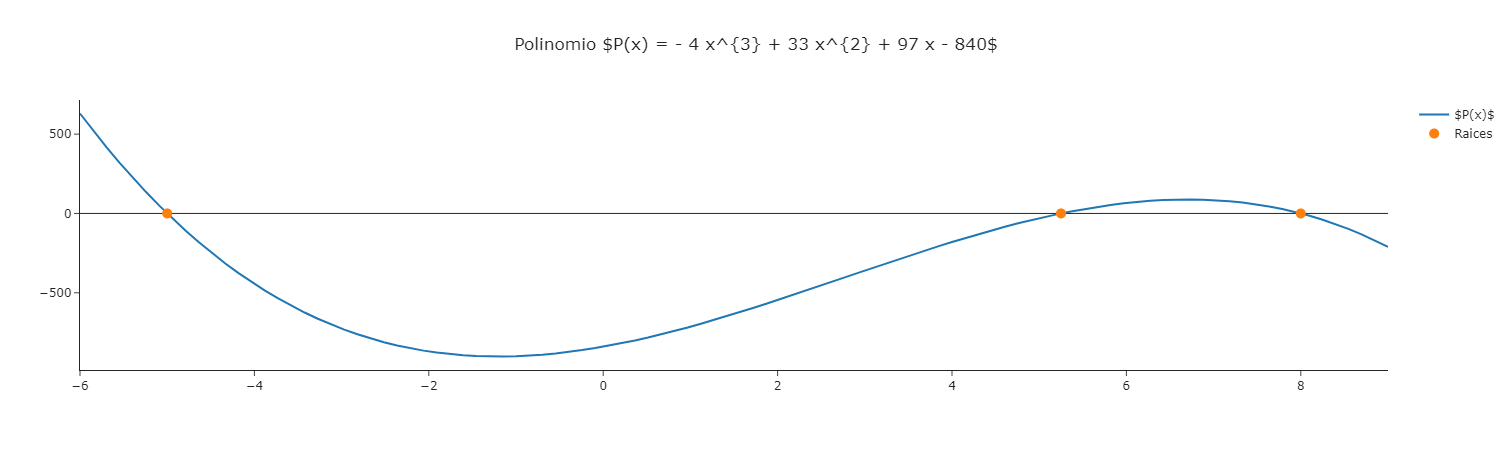

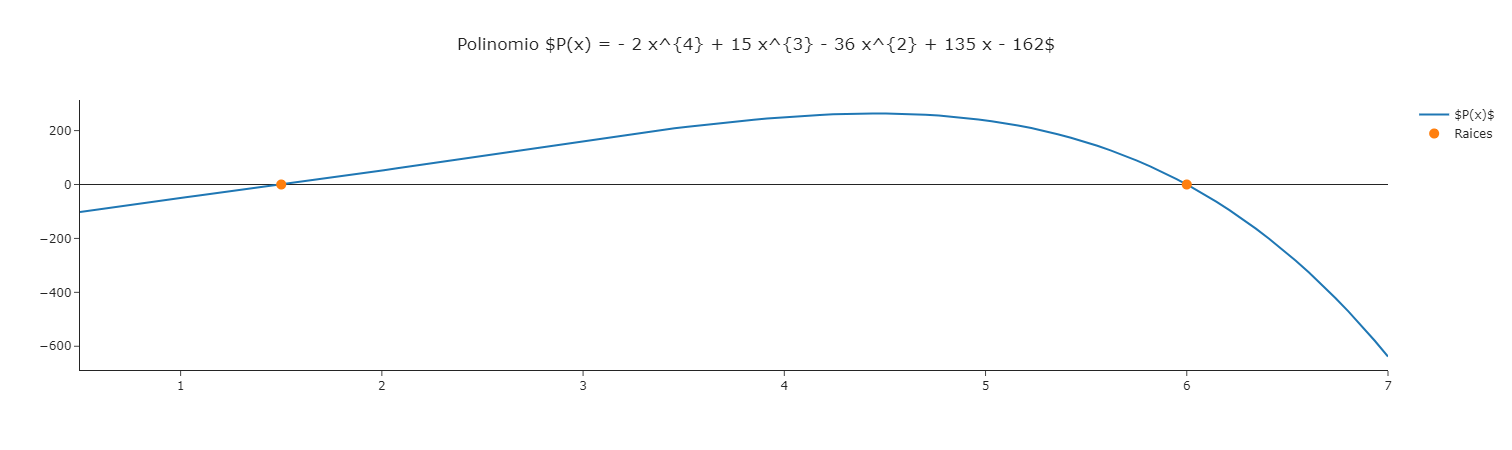

In [415]:
# Realice las pruebas que se indican
plotly.offline.init_notebook_mode(connected=True)
f_1 = RealPolynomial([-4,33,97,-840])
f_1.graph()
display(Image("plots/ejercicio 1/1.png"))
f_2 = RealPolynomial([-2,15,-36,135,-162])
f_2.graph()
display(Image("plots/ejercicio 1/2.png"))

## Ejercicio 2 (6 puntos)

Programar la función que resuelve el problema de ajustar un polinomio a 
un conjunto de puntos $\{(x_0, y_0), (x_1, y_1), ..., (x_m, y_m)\}$ usando
mínimos cuadrados lineales.

Si revisan las notas del curso de métodos numéricos, se ve que para
ajustar el polinomio de grado $n$ 
$p(x) = c_n x^n + c_{n-1} x^{n-1} + ... + c_1 x + c_0$ 
mediante mínimos cuadrados, hay que plantear el problema
de minimizar la suma de diferencias elevadas al cuadrado:

$\sum_{i=0}^{m} (p(x_i) - y_i )^2$

Esto nos lleva a construir la matriz $A$ y el vector de términos independientes

$$ A = \left[\begin{array}{ccccc}
x_1^n  & x_1^{n-1} & \cdots & x_1 & 1 \\
x_2^n  & x_2^{n-1} & \cdots & x_2 & 1 \\
\vdots & \vdots    &        & \vdots  & \vdots \\
x_m^n  & x_m^{n-1} & \cdots & x_m & 1 
\end{array}\right], \qquad
b =\left( \begin{array}{c}
y_1 \\ y_2 \\ \vdots \\ y_m
\end{array}  
\right)$$


Entonces el vector  $c$  con los coeficientes del polinomio
se obtiene resolviendo el sistema de ecuaciones 

$A^{\top} A c= A^{\top} y$.


1. Programe la función que recibe como argumento un arreglo 2D que 
   contiene los puntos $\{(x_0, y_0), (x_1, y_1), ..., (x_m, y_m)\}$ y
   el grado del polinomio $n$, que construya y resuelva el sistema de ecuaciones
   para obtener el vector de coeficientes $c$ usando las funciones
   de Numpy y que devuelva
   este arreglo y el número de condición de la matriz del sistema.
   Este último dato lo puede obtener usando la función `numpy.linalg.cond()`.
2. Escriba una función que reciba como argumentos el nombre de un archivo
   que contiene los datos, el valor $n$ del grado del polinomio que 
   se quiere ajustar y un entero $r>0$.
*  La función debe leer el archivo, cargar los datos
   en una matriz y usar la función del inciso anterior para obtener el
   vector de coeficientes $c$ y el número de condición. 
   El archivo contiene una matriz con dos columnas. La primer columna tiene
   las abscisas $x_0, x_1, ..., x_{m}$ y la segunda columna tiene las
   ordenadas $y_0, y_1, ..., y_{m}$ de los puntos.
*  Obtenga el valor mínimo $x_{\min}$ y máximo  $x_{\max}$ de las abscicas $x_i$.  
*  Genere una partición $z_0, z_1, ..., z_{r-1}$ del intervalo  
   $[x_{\min}, x_{\min}]$ con $r$ puntos y 
   use la función `numpy.polyval()` para evaluar el polinomio $p(x)$
   en los puntos de la partición del intervalo.
*  Haga que la función imprima el grado $n$ del polinomio,
   los coeficientes $\mathbf{c}$ del polinomio y el número de
   condición. También haga que la función genere 
   una gráfica que muestre los puntos $\{(x_0, y_0), (x_1, y_1), ..., (x_m, y_m)\}$
   (como puntos) y los puntos $(z_i, p(z_i))$ con un trazo continuo para
   comparar los datos con la gráfica del polinomio.
3. Pruebe la función del inciso anterior usando los archivos `npy` que se encuentran
   dentro del archivo `datosTarea02.zip`.
   Para cada caso, use $r=100$ y $n=1,2,3,4,5$  y $6$ (puede poner un ciclo para
   generar los resultados de cada caso).
   
### Solución:

In [412]:
# En esta celda puede poner el código de las funciones
# o poner la instrucción para importarlas de un archivo .py
class RealPolynomialMinSquare(RealPolynomial):
    def __init__(self, n, points):
        self._points = points.copy()
        x = np.array([self._points[:,0]]).T
        y = np.array([self._points[:,1]]).T
        A = np.concatenate([x**i for i in reversed(range(n+1))], axis=1)
        c = np.linalg.solve(A.T@A,A.T@y)
        self._condition = np.linalg.cond(c)
        super().__init__(c.T.squeeze())
    def coefficients(self):
        return self._paramaters, self._condition

import itertools

def read_points_npy(path):
    return np.array(np.load(path))

def ejercicio(paths, N, R):
    for path in paths:
        points = read_points_npy(path)
        points = points[np.lexsort((points[:,1],points[:,0]))]
        for n, r in itertools.product(N, R):
            print(f"N = {n}, R = {r}")
            P = RealPolynomialMinSquare(n, points)
            coefficients, condition = P.coefficients()
            P.graph(points[0,0], points[-1,0], r, points)
            display(Image("plots/ejercicio 2/" + path.split(".",1)[0] + f"/N{n}R{r}.png"))
            print(condition)

C:\Users\batma\AppData\Local\Temp\ipykernel_9720\3048823763.py:16: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



N = 1, R = 100


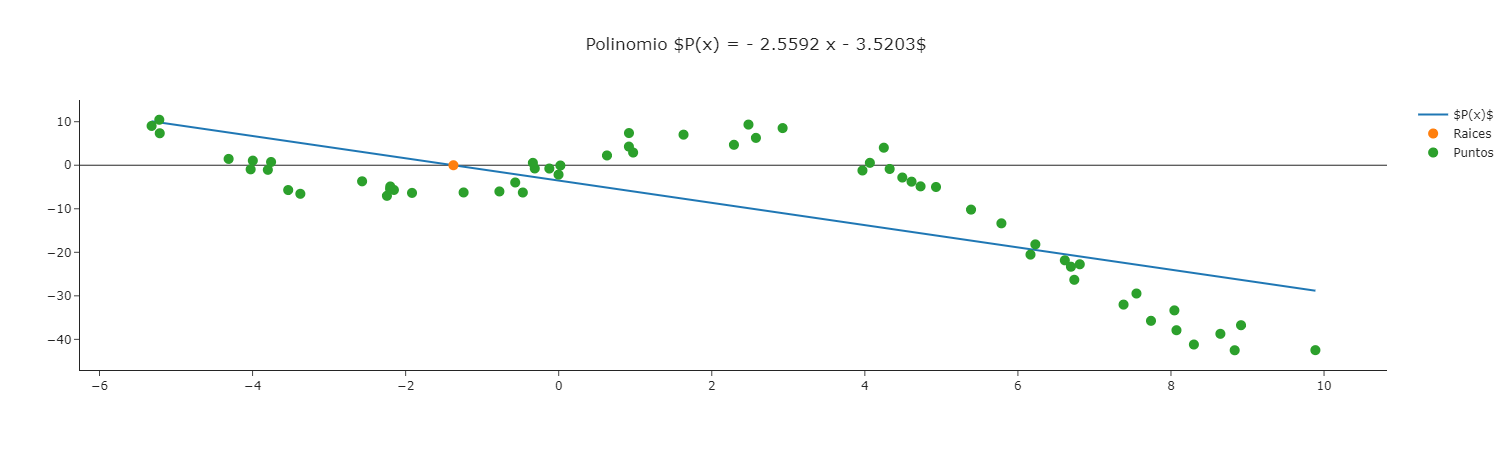

1.0
N = 2, R = 100


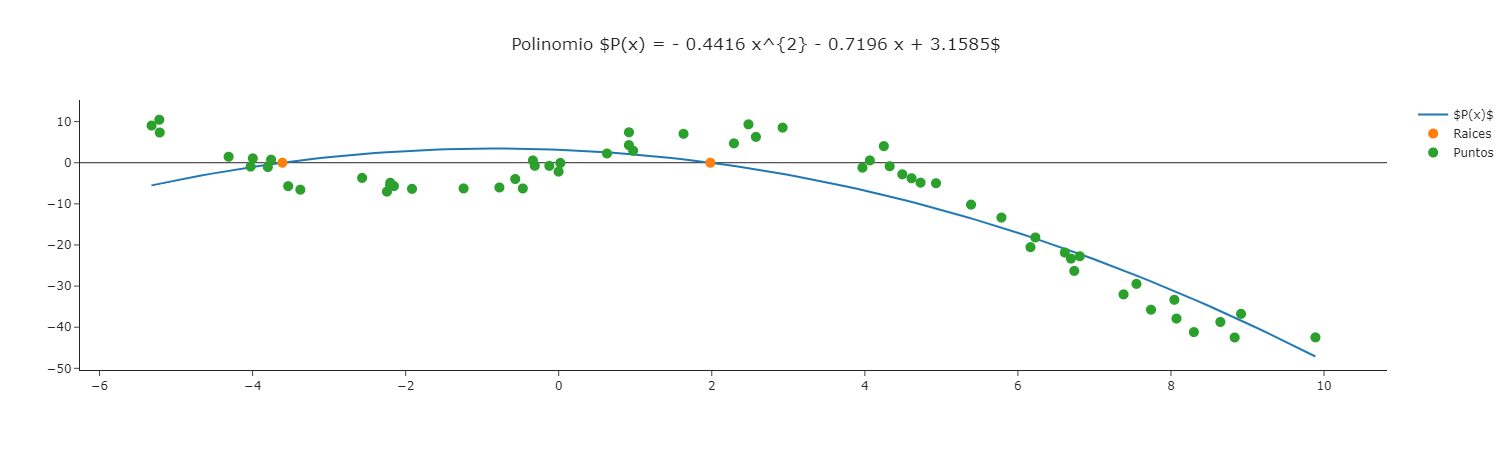

1.0
N = 3, R = 100


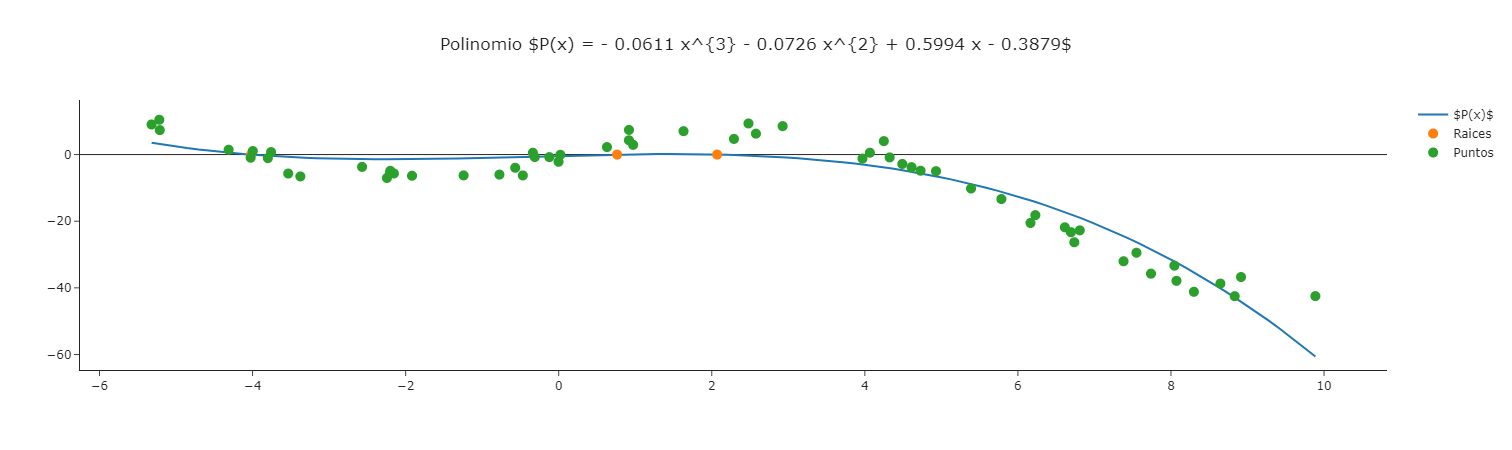

1.0
N = 4, R = 100


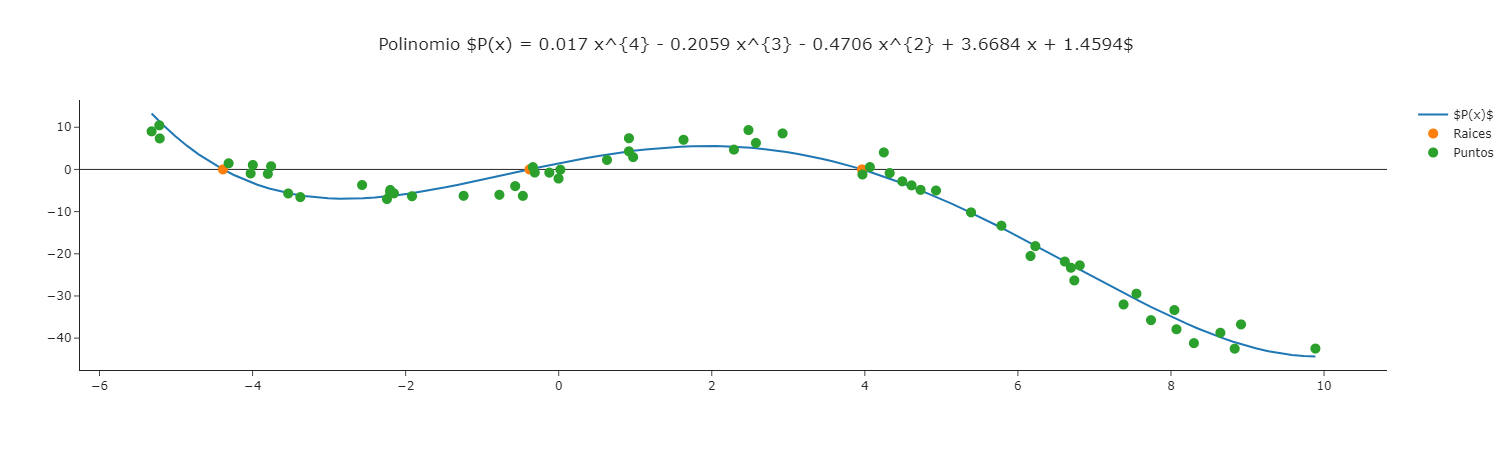

1.0
N = 5, R = 100


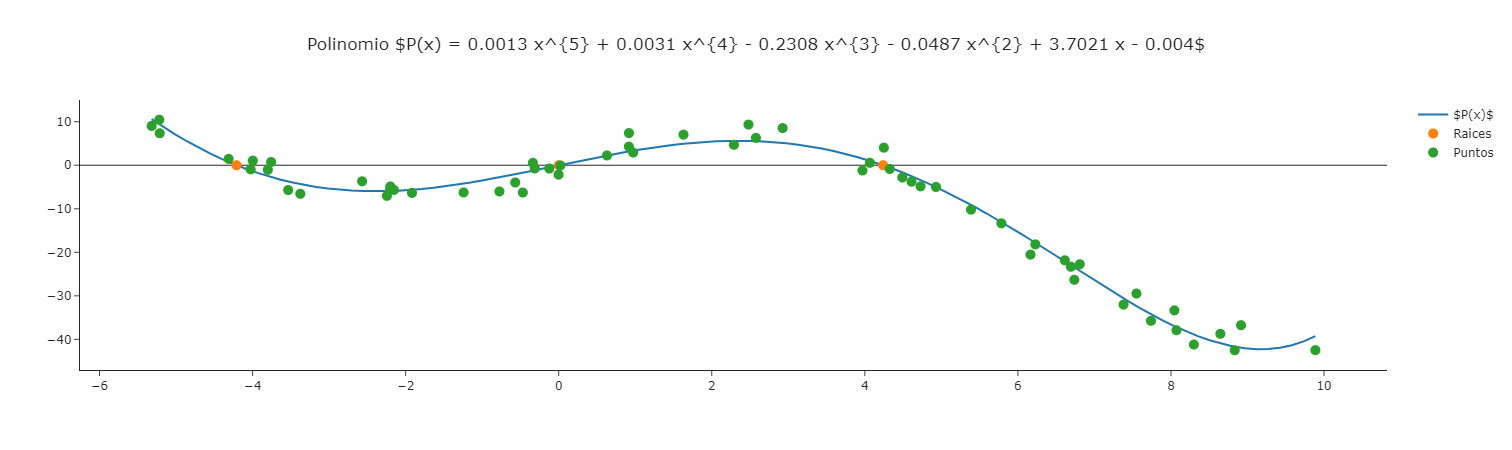

1.0
N = 6, R = 100


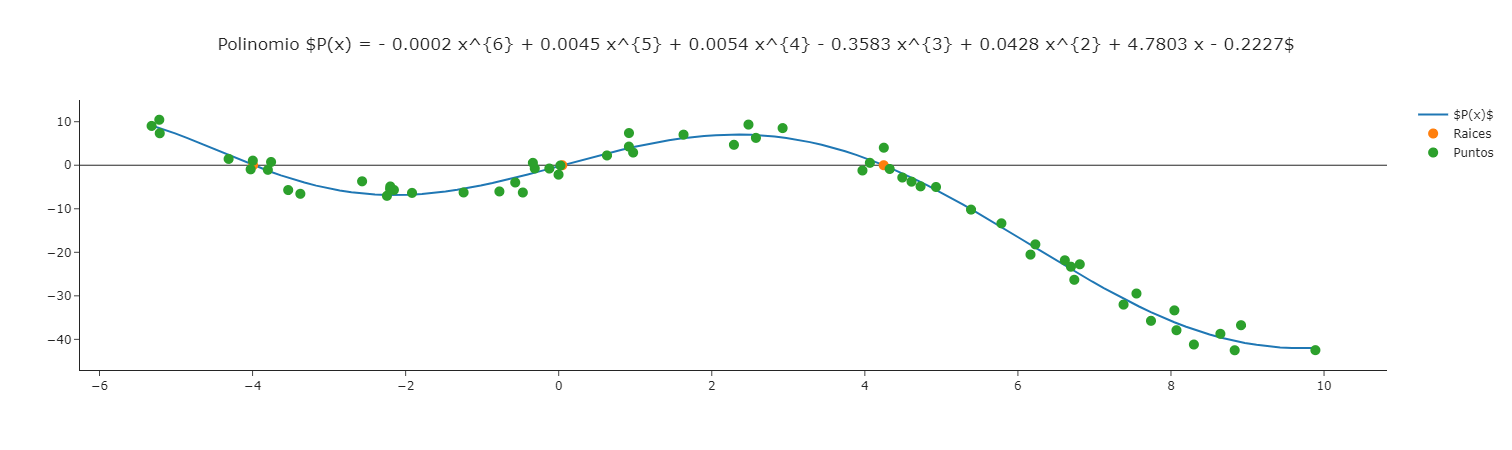

1.0
N = 1, R = 100


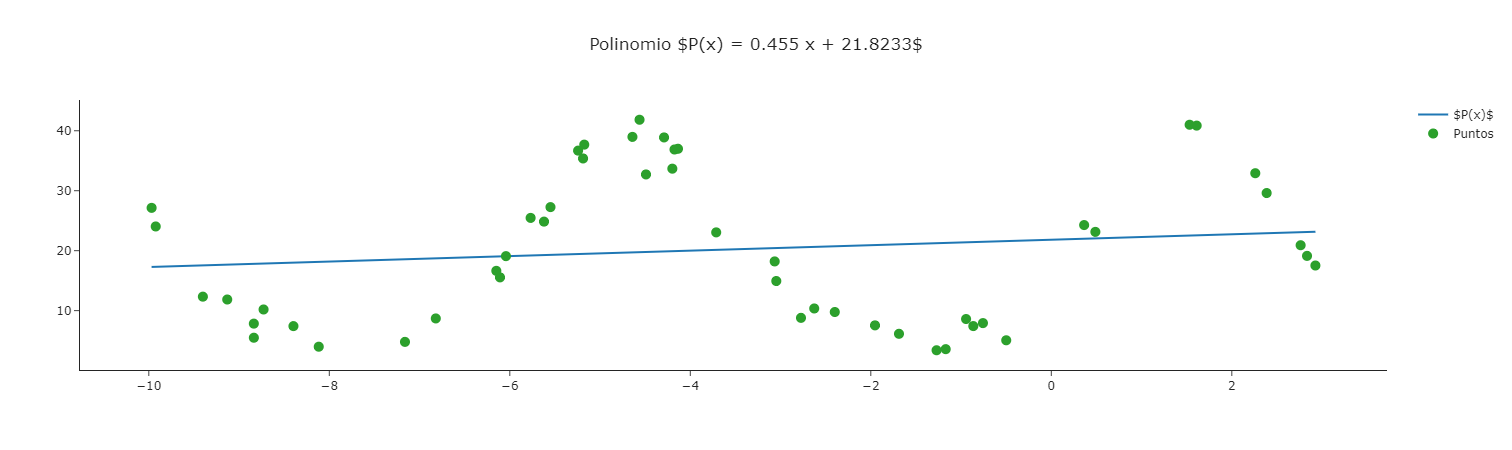

1.0
N = 2, R = 100


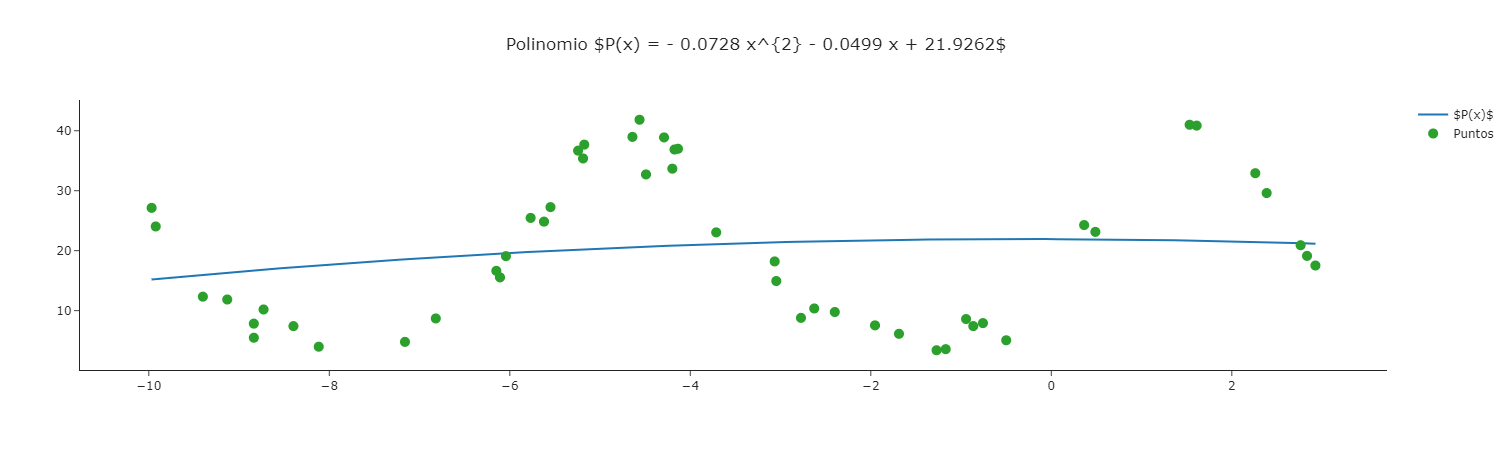

1.0
N = 3, R = 100


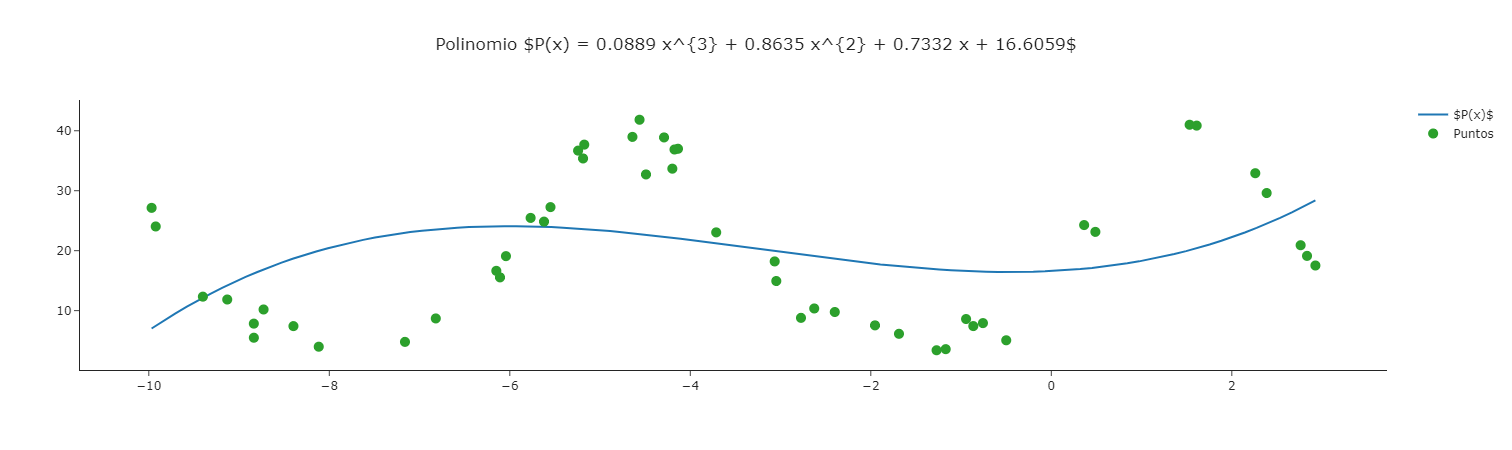

1.0
N = 4, R = 100


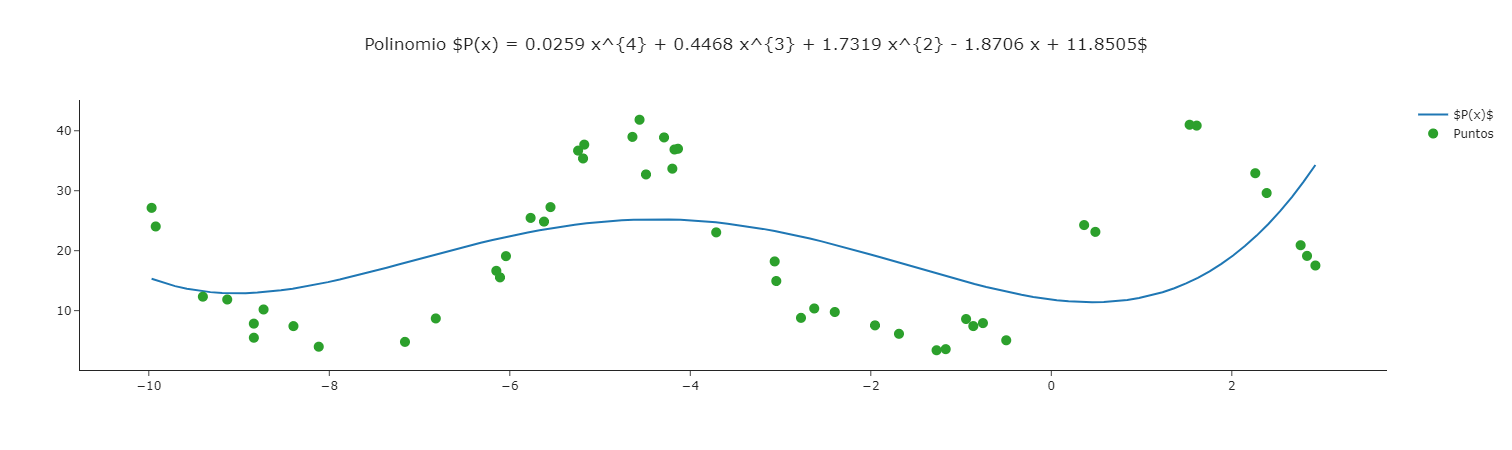

1.0
N = 5, R = 100


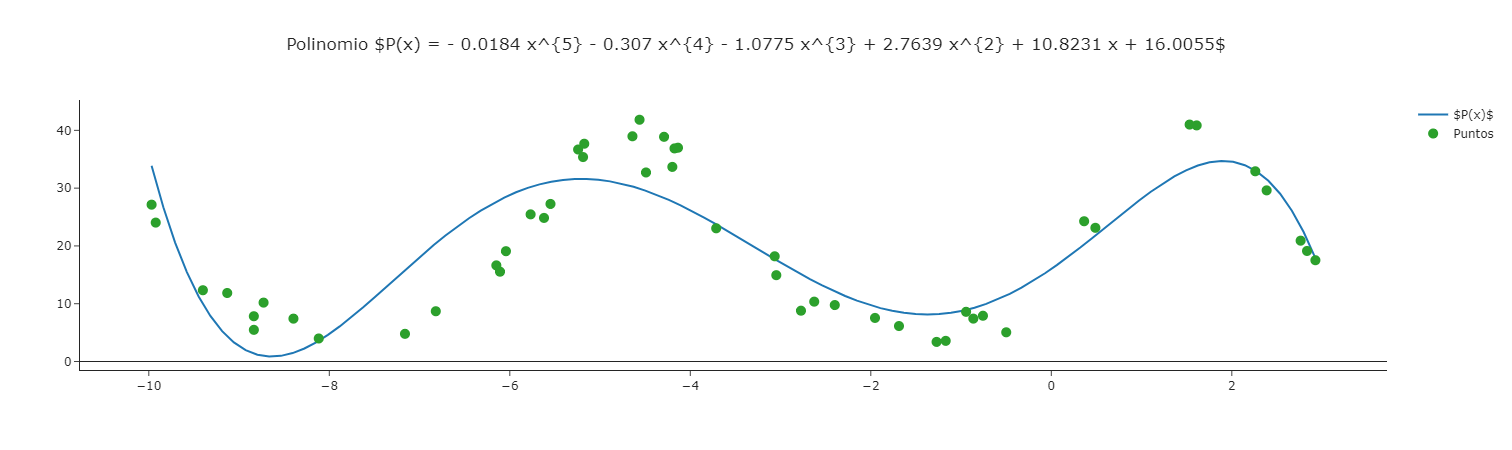

1.0
N = 6, R = 100


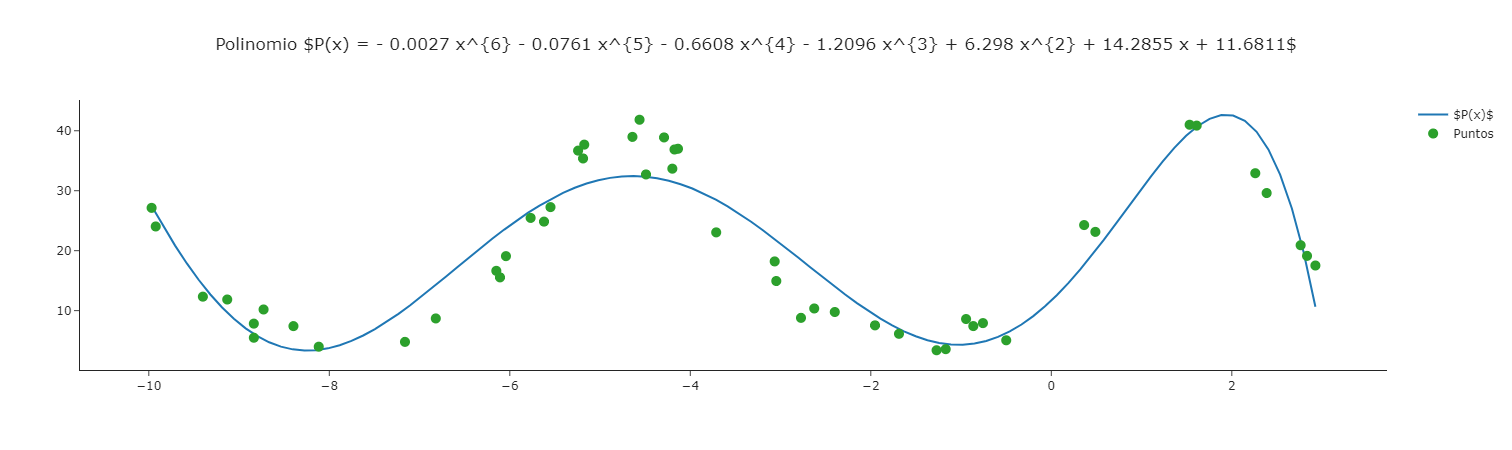

1.0


In [413]:
# Lectura de datos y pruebas realizadas
paths = ["datos/1.npy","datos/2.npy"]
N = [1,2,3,4,5,6]
R = [100]
ejercicio(paths, N, R)

Nota: No se uso la función `numpy.polyval()` por como se implemento la clase `RealPolynomialMinSquare`, para hacer uso de esta función bien se pudo haber sobreescrito la función graph en esta última clase en la siguiente parte

``` python
x = np.linspace(tmin, tmax, partition_size)
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=x,
        y=[self.__call__(x) for x in x], #Aquí poner y=numpy.polyval(self._parameters, x)
        mode="lines", name=r'$P(x)$'
    )
)
```
Puesto que ya lo había implementado para el ejercicio anterior preferí usarlo.